# Airbnb Price Prediction and Demand Forecasting


## Table of contents <a class="anchor" id="0.1"></a>

1. [Objectives](#1)
2. [Short Data Description](#2)
3. [Metadata](#3)
4. [Import Libraries](#4)
5. [Data Preprocessing and Cleaning](#5)
6. [Feature Engineering](#6)
7. [Modeling and Feature selection](#7)
8. [Hyper Parameter Tuning](#8)
9. [Price Prediction Result](#9)
10. [Demand Forecasting(for avability)](#10)
11. [Results for Demand Forecasting](#11)

## Objectives <a class="anchor" id="1"></a>

* The objective of this project is to develop a machine learning models for predicting the prices of Airbnb listings and forecasting demand of listings(Checking the availability).

## Short Data Description <a class="anchor" id="2"></a>

*  The "Inside Airbnb" dataset provides a comprehensive snapshot of Airbnb listings, encompassing various features crucial for analysis and modeling. This dataset includes key attributes such as host response time, rates, property characteristics, location coordinates, room types, amenities, pricing details, availability metrics, and guest reviews. With information ranging from host interactions to property specifications, this dataset serves as a rich source for understanding the dynamics of Airbnb listings, facilitating tasks such as price prediction, demand forecasting.
* We have taken the Airbnb data of major cities of Canada.

|City|
|:--|
|Toronto|
|Montreal|
|New Brunswick|
|Quebec|
|Vancouver|
|Winnipeg|
|Victoria|

## Metedata <a class="anchor" id="3"></a>

##### We have total 76 features in dataset :

Following is the description of some of the important features:

|COLUMN| DESCRIPTION|
|:--|:--|
|id|Airbnb's unique identifier for the listing|
|name|Name of the listing|
|host_response_time|The average time taken by the host to respond to inquiries from potential guests|
|host_response_rate| The percentage of inquiries to which the host responds|
|host_acceptance_rate|The percentage of booking requests accepted by the host|
|latitude|The latitude coordinate of the property's location|
|longitude|The longitude coordinate of the property's location|
|property_type|The type or category of the property (e.g., apartment, house, etc.)|
|room_type|The type of room offered (e.g., entire home, private room, shared room)|
|accommodates|The maximum number of guests the property can accommodate.
|bathrooms|The number of bathrooms available in the property|
|bedrooms|The number of bedrooms available in the property|
|beds|The number of beds available in the property|
|amenities|The list of additional amenities provided with the property|
|price|The cost of renting the property|
|maximum_nights|The maximum number of nights allowed for booking|
|availability_30|The number of days the property is available for booking in the next 30 days|
|availability_60|The number of days the property is available for booking in the next 60 days|
|number_of_reviews|The total number of reviews for the property|
|review_scores_rating|The overall rating score given by guests in reviews|
|instant_bookable|Indicates whether the property can be instantly booked without host approval|

## Import Libraries <a class="anchor" id="4"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

warnings.filterwarnings("ignore")

#### Importing and Displaying Data

In [2]:
df = pd.read_csv('AIRBNB_listings.csv')

In [3]:
df.shape

(49448, 76)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49448 entries, 0 to 49447
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            49448 non-null  float64
 1   listing_url                                   49448 non-null  object 
 2   scrape_id                                     49448 non-null  float64
 3   last_scraped                                  49448 non-null  object 
 4   source                                        49448 non-null  object 
 5   name                                          49448 non-null  object 
 6   description                                   49066 non-null  object 
 7   neighborhood_overview                         26548 non-null  object 
 8   picture_url                                   49448 non-null  object 
 9   host_id                                       49448 non-null 

## Data Preprocessing and Cleaning <a class="anchor" id="5"></a>

In [5]:
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [6]:
df.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               13516
city                                                0
Length: 76, dtype: int64

#### Dropping 
* Herer we are dropping features which are insignificant for our Prediction

In [7]:
df1 = df.drop(columns=['id','listing_url','scrape_id','last_scraped','source','picture_url','host_id','host_url','host_name',
                 'host_thumbnail_url','host_listings_count','host_has_profile_pic',
                 'host_verifications','host_identity_verified','neighbourhood_group_cleansed',
                 'bathrooms','calendar_updated','calendar_last_scraped','license','calculated_host_listings_count',
                 'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                 'calculated_host_listings_count_shared_rooms','neighborhood_overview','host_about','host_neighbourhood','host_location'
                      ,'host_picture_url','host_neighbourhood','host_is_superhost','neighbourhood','host_since'])

In [8]:
df1.head(2)

,name,description,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,city
0,Rental unit in Montreal · ★4.69 · 1 bedroom · ...,CITQ 267153<br />Lovely studio with 1 closed r...,within an hour,100%,99%,2.0,Ville-Marie,45.51939,-73.56482,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Portable fans"", ""Outdoor furniture"", ""Books ...",$179.00,2,60,2,2,1125,1125,2.0,1125.0,t,5,17,26,270,419,52,1,2010-06-20,2023-05-15,4.69,4.81,4.65,4.82,4.78,4.82,4.7,f,2.65,Montreal
1,Home in Montreal · ★4.68 · 2 bedrooms · 2 beds...,Lovely historic house with plenty of period ch...,within an hour,100%,99%,2.0,Ville-Marie,45.51929,-73.56493,Entire home,Entire home/apt,4,1 bath,2.0,2.0,"[""Outdoor furniture"", ""Books and reading mater...",$396.00,3,21,3,3,21,21,3.0,21.0,t,5,12,21,278,115,20,2,2012-02-23,2023-05-24,4.68,4.84,4.63,4.86,4.79,4.87,4.7,f,0.84,Montreal


* Below is the shape of our dataset

In [9]:
df1.shape

(49448, 45)

* Following is the counts of different Cities of Canada in our Dataset. 
* We have most data of cities Toronto & Montreal being two Famous Cities of Canada.

In [10]:
df1['city'].value_counts()

Toronto      22356
Montreal      8630
Vancouver     6355
Victoria      4700
NewB          3581
Quebec        2190
Winnipeg      1636
Name: city, dtype: int64

###### Percentage of % missing values according to features
* As we can see the percentage of null values persent in each column is 27 % or less.

In [11]:

features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]


for feature in features_with_na:
    print(f'{feature:<30} {np.round(df1[feature].isnull().mean() * 100, 4):<10}%                   missing values')


description                    0.7725    %                   missing values
host_response_time             18.1666   %                   missing values
host_response_rate             18.1666   %                   missing values
host_acceptance_rate           15.5658   %                   missing values
host_total_listings_count      0.004     %                   missing values
bathrooms_text                 0.0243    %                   missing values
bedrooms                       25.3276   %                   missing values
beds                           0.8635    %                   missing values
first_review                   27.3338   %                   missing values
last_review                    27.3338   %                   missing values
review_scores_rating           27.3338   %                   missing values
review_scores_accuracy         27.6553   %                   missing values
review_scores_cleanliness      27.6472   %                   missing values
review_score

##### Extracting bedroom,bathtroom and values from name column 
* Here we are extracting Bedroom, Beds, Bathroom values from **"name"** column.
* Reason being, we have quite a high missing value rate in these columns, which can be imputed from name column.

In [12]:
l = []
for i in df1["name"]:
    try:
        d = {"new_bedroom" : np.nan, "new_bed" : np.nan, "new_bath" : np.nan}
        last_3 = i.split("·")[-3:]
        if "bedroom" in last_3[0].lower():
            d["new_bedroom"] = float(last_3[0].strip().split()[0])
        if "bed" in last_3[1].lower():
            d["new_bed"] = float(last_3[1].strip().split()[0])
        if "half" in last_3[2].lower():
            d["new_bath"] = float(0.5)
        elif "bath" in last_3[2]:
            d["new_bath"] = float(last_3[2].strip().split()[0])
        l.append(d)
    except Exception as e:
        print("-"*50)
        print("Error-",e)
        print(last_3)
        print("-"*50)
        l.append(d)
df__ = pd.DataFrame(l)

--------------------------------------------------
Error- list index out of range
['Campsite in Dalhousie ', ' 0 baths']
--------------------------------------------------
--------------------------------------------------
Error- list index out of range
['Campsite in Elgin Parish ', ' 0 baths']
--------------------------------------------------
--------------------------------------------------
Error- list index out of range
['Rental unit in Toronto ', ' 1 bedroom']
--------------------------------------------------
--------------------------------------------------
Error- list index out of range
['Hotel in Toronto ', ' Studio']
--------------------------------------------------


* Below is the **DataFrame** for new features.
* In the following steps we're goind to merge the new features with actual data. 
* Then to avoid redundancy we'll drop the original feature containing same values.

In [13]:
df__.head()

,new_bedroom,new_bed,new_bath
0,1.0,2.0,1.0
1,2.0,2.0,1.0
2,2.0,3.0,1.0
3,1.0,2.0,1.0
4,4.0,4.0,1.0


In [14]:
df_new = pd.concat([df1, df__], axis=1)

In [15]:
df_new

,name,description,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,city,new_bedroom,new_bed,new_bath
0,Rental unit in Montreal · ★4.69 · 1 bedroom · ...,CITQ 267153<br />Lovely studio with 1 closed r...,within an hour,100%,99%,2.0,Ville-Marie,45.51939,-73.56482,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Portable fans"", ""Outdoor furniture"", ""Books ...",$179.00,2,60,2,2,1125,1125,2.0,1125.0,t,5,17,26,270,419,52,1,2010-06-20,2023-05-15,4.69,4.81,4.65,4.82,4.78,4.82,4.70,f,2.65,Montreal,1.0,2.0,1.0
1,Home in Montreal · ★4.68 · 2 bedrooms · 2 beds...,Lovely historic house with plenty of period ch...,within an hour,100%,99%,2.0,Ville-Marie,45.51929,-73.56493,Entire home,Entire home/apt,4,1 bath,2.0,2.0,"[""Outdoor furniture"", ""Books and reading mater...",$396.00,3,21,3,3,21,21,3.0,21.0,t,5,12,21,278,115,20,2,2012-02-23,2023-05-24,4.68,4.84,4.63,4.86,4.79,4.87,4.70,f,0.84,Montreal,2.0,2.0,1.0
2,Rental unit in Montreal · ★4.88 · 2 bedrooms ·...,Welcome to Montreal<br /><br />Looking for an ...,within a day,100%,60%,1.0,Rosemont-La Petite-Patrie,45.53818,-73.60360,Entire rental unit,Entire home/apt,4,1 bath,2.0,3.0,"[""Outdoor furniture"", ""Free street parking"", ""...",$160.00,14,31,14,14,31,31,14.0,31.0,t,3,11,12,57,9,2,0,2010-11-14,2022-11-18,4.88,4.88,5.00,5.00,5.00,4.63,4.88,f,0.06,Montreal,2.0,3.0,1.0
3,Rental unit in Montréal · ★4.88 · 1 bedroom · ...,"Enjoy the best of Montreal in this romantic, ...",within an hour,90%,85%,11.0,Le Plateau-Mont-Royal,45.53026,-73.58413,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Indoor fireplace"", ""Free street parking"", ""F...",$160.00,32,730,32,32,730,730,32.0,730.0,t,0,0,9,284,48,6,0,2015-05-25,2023-05-01,4.88,4.92,4.85,4.92,4.89,4.88,4.77,f,0.49,Montreal,1.0,2.0,1.0
4,Rental unit in Montreal · ★4.60 · 4 bedrooms ·...,Each of the bedrooms are also equipped with de...,within an hour,93%,100%,2.0,Côte-des-Neiges-Notre-Dame-de-Grâce,45.47012,-73.60725,Private room in rental unit,Private room,5,1 shared bath,NaN,4.0,"[""Books and reading material"", ""Baking sheet"",...",$75.00,3,365,3,3,1125,1125,3.0,1125.0,t,11,28,51,326,44,15,0,2011-07-15,2023-05-05,4.60,4.68,4.16,4.93,4.80,4.61,4.61,t,0.30,Montreal,4.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49443,Rental unit in Winnipeg · ★New · 1 bedroom · 1...,You'll have a great time at this comfortable p...,within an hour,100%,100%,10.0,Daniel McIntyre,49.89363,-97.14547,Entire rental unit,Entire home/apt,4,1 bath,1.0,1.0,"[""Wifi"", ""Paid parking on premises"", ""TV"", ""Wa...",$109.00,1,365,1,1,365,365,1.0,365.0,t,28,52,82,357,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,Winnipeg,1.0,1.0,1.0
49444,Rental unit in Winnipeg · ★New · 2 bedrooms · ...,You'll have a great time at this comfortable p...,within an hour,100%,100%,10.0,Daniel McIntyre,49.89358,-97.14580,Entire rental unit,Entire home/apt,6,1 bath,2.0,3.0,"[""Wifi"", ""Paid parking on premises"", ""TV"", ""Wa...",$140.00,1,365,1,1,365,365,1.0,365.0,t,21,30,56,331,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,Winnipeg,2.0,3.0,1.0
49445,Home in Winnipeg · ★New · 1 bedroom · 1 bed · ...,This is a quiet and peaceful on

In [16]:
df_new = df_new.drop(['bedrooms','beds','bathrooms_text'], axis=1)

In [17]:
df_new = df_new.rename(columns={'new_bedroom':'bedrooms','new_bed':'beds','new_bath':'bathrooms'})

* Following is the information of new data.

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49448 entries, 0 to 49447
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         49448 non-null  object 
 1   description                  49066 non-null  object 
 2   host_response_time           40465 non-null  object 
 3   host_response_rate           40465 non-null  object 
 4   host_acceptance_rate         41751 non-null  object 
 5   host_total_listings_count    49446 non-null  float64
 6   neighbourhood_cleansed       49448 non-null  object 
 7   latitude                     49448 non-null  float64
 8   longitude                    49448 non-null  float64
 9   property_type                49448 non-null  object 
 10  room_type                    49448 non-null  object 
 11  accommodates                 49448 non-null  int64  
 12  amenities                    49448 non-null  object 
 13  price           

##### As we can see many null values. We are going to drop all the null values.
* We have to remove all the null values as we couldn't find any effective method to impute them without imposing additional noice in our data which would have been a barrier for us to get good results for our later price predictions & forecasting.

In [19]:
df_new.isnull().sum()

name                               0
description                      382
host_response_time              8983
host_response_rate              8983
host_acceptance_rate            7697
host_total_listings_count          2
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
minimum_minimum_nights             0
maximum_minimum_nights             0
minimum_maximum_nights             0
maximum_maximum_nights             0
minimum_nights_avg_ntm             0
maximum_nights_avg_ntm             0
has_availability                   0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
n

In [20]:
# Dropping Null values

df_train = df_new.dropna()

In [21]:
## Dropping name and description as we don't need these features in further steps

df_train = df_train.drop(['name','description','first_review'], axis=1)

* As we can see there are no null values remaining

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27025 entries, 0 to 49436
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           27025 non-null  object 
 1   host_response_rate           27025 non-null  object 
 2   host_acceptance_rate         27025 non-null  object 
 3   host_total_listings_count    27025 non-null  float64
 4   neighbourhood_cleansed       27025 non-null  object 
 5   latitude                     27025 non-null  float64
 6   longitude                    27025 non-null  float64
 7   property_type                27025 non-null  object 
 8   room_type                    27025 non-null  object 
 9   accommodates                 27025 non-null  int64  
 10  amenities                    27025 non-null  object 
 11  price                        27025 non-null  object 
 12  minimum_nights               27025 non-null  int64  
 13  maximum_nights  

In [23]:
df_train = df_train.reset_index(drop=True)

In [24]:
df_train.shape

(27025, 42)

In [25]:
df_train.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,city,bedrooms,beds,bathrooms
0,within an hour,100%,99%,2.0,Ville-Marie,45.51939,-73.56482,Entire rental unit,Entire home/apt,4,"[""Portable fans"", ""Outdoor furniture"", ""Books ...",$179.00,2,60,2,2,1125,1125,2.0,1125.0,t,5,17,26,270,419,52,1,2023-05-15,4.69,4.81,4.65,4.82,4.78,4.82,4.70,f,2.65,Montreal,1.0,2.0,1.0
1,within an hour,100%,99%,2.0,Ville-Marie,45.51929,-73.56493,Entire home,Entire home/apt,4,"[""Outdoor furniture"", ""Books and reading mater...",$396.00,3,21,3,3,21,21,3.0,21.0,t,5,12,21,278,115,20,2,2023-05-24,4.68,4.84,4.63,4.86,4.79,4.87,4.70,f,0.84,Montreal,2.0,2.0,1.0
2,within a day,100%,60%,1.0,Rosemont-La Petite-Patrie,45.53818,-73.60360,Entire rental unit,Entire home/apt,4,"[""Outdoor furniture"", ""Free street parking"", ""...",$160.00,14,31,14,14,31,31,14.0,31.0,t,3,11,12,57,9,2,0,2022-11-18,4.88,4.88,5.00,5.00,5.00,4.63,4.88,f,0.06,Montreal,2.0,3.0,1.0
3,within an hour,90%,85%,11.0,Le Plateau-Mont-Royal,45.53026,-73.58413,Entire rental unit,Entire home/apt,2,"[""Indoor fireplace"", ""Free street parking"", ""F...",$160.00,32,730,32,32,730,730,32.0,730.0,t,0,0,9,284,48,6,0,2023-05-01,4.88,4.92,4.85,4.92,4.89,4.88,4.77,f,0.49,Montreal,1.0,2.0,1.0
4,within an hour,93%,100%,2.0,Côte-des-Neiges-Notre-Dame-de-Grâce,45.47012,-73.60725,Private room in rental unit,Private room,5,"[""Books and reading material"", ""Baking sheet"",...",$75.00,3,365,3,3,1125,1125,3.0,1125.0,t,11,28,51,326,44,15,0,2023-05-05,4.60,4.68,4.16,4.93,4.80,4.61,4.61,t,0.30,Montreal,4.0,4.0,1.0


### Converting String data to numeric
* There are a few features whihc are numeric but has, 'O' (String) DataType.
* So we'll remove non-numeric data from those features and convert them to Integer.

In [26]:
## Converting String data to numeric
import re

def convert_to_numeric(dt):
    return int(re.search(r'\d+', dt).group())

df_train['host_acceptance_rate'] = df_train['host_acceptance_rate'].apply(lambda x: convert_to_numeric(x))
df_train['host_response_rate'] = df_train['host_response_rate'].apply(lambda x: convert_to_numeric(x))
df_train['price'] = df_train['price'].apply(lambda x: convert_to_numeric(x))

#### Here we are removing unique property_types.
* Very unique property type might bring noice in data and reduce the prediction ability of the model.
* So, we are removing data which has property type count less than 50.


In [28]:
# Dropping property_type which has less than 100 count


property_type_counts = df_train['property_type'].value_counts()
property_types_to_drop = property_type_counts[property_type_counts < 50].index.tolist()
df_train = df_train.loc[~df_train['property_type'].isin(property_types_to_drop)]

In [29]:
df_train['property_type'].value_counts()

Entire rental unit                   7198
Entire condo                         4474
Entire home                          3819
Private room in home                 3155
Entire guest suite                   1981
Private room in rental unit           949
Entire loft                           633
Entire cottage                        578
Private room in condo                 415
Entire townhouse                      411
Private room in bungalow              326
Entire guesthouse                     310
Private room in townhouse             309
Entire serviced apartment             292
Entire cabin                          227
Private room in guest suite           224
Entire bungalow                       206
Private room in bed and breakfast     195
Room in boutique hotel                121
Private room in villa                 109
Room in hotel                          80
Tiny home                              77
Shared room in hostel                  74
Entire vacation home              

#### In the following steps we are handling outliers 
* We are only detecting and removing for Price feature, as it is our main target feature.

In [30]:
def detect_outliers(data, feat):
    """Detect Outlier and plot Boxplot of the column

    Args:
        data (DataFrame): DataFrame Object
        feat (String): Column Name
    """
    feat = data[feat]
    
    Q1 = feat.quantile(0.25)
    Q3 = feat.quantile(0.75)

    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(feat < lower_bound) | (feat > upper_bound)]

    print("Number of outliers:", len(outliers))
    
    fig = px.box(data, y=feat)
    fig.show()

In [31]:
def remove_outliers(data, feat):
    """Remove Outliers

    Args:
        data (DataFrame): DataFrame Object
        feat (String): Column Name

    Returns:
        DataFrame: Outlier Removed DataFrame
    """
    feat = data[feat]
    
    Q1 = feat.quantile(0.25)
    Q3 = feat.quantile(0.75)

    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(feat < lower_bound) | (feat > upper_bound)].index
    data = data.drop(outliers)
    return data

In [32]:
df_train = remove_outliers(df_train, 'price')

In [33]:
df_train = df_train.reset_index(drop=True)

In [34]:
df_train.shape

(25309, 42)

## Feature Engineering <a class="anchor" id="6"></a>

#### Label and one hot encoding
* Here we are performing Label Encoding Using Sklearn's LabelEncoder
* As some features have very less categorical values, we can convert them to numeric using Label Encoding.

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [36]:
## We are going to label encode "host_response_time", "room_type", "has_availability" , "instant_bookable"
## As these features don't have many unique values

label = ["host_response_time", "room_type", "has_availability" , "instant_bookable"]

for l in label:
    df_train[l] = label_encoder.fit_transform(df_train[l])

In [37]:
df_train.head(1)

,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,city,bedrooms,beds,bathrooms
0,3,100,99,2.0,Ville-Marie,45.51939,-73.56482,Entire rental unit,0,4,"[""Portable fans"", ""Outdoor furniture"", ""Books ...",179,2,60,2,2,1125,1125,2.0,1125.0,1,5,17,26,270,419,52,1,2023-05-15,4.69,4.81,4.65,4.82,4.78,4.82,4.7,0,2.65,Montreal,1.0,2.0,1.0


In [38]:
df_train['last_review'].value_counts()

2023-06-04    953
2023-05-29    760
2023-05-28    670
2023-05-22    646
2023-05-31    584
             ... 
2020-06-20      1
2019-11-19      1
2018-01-01      1
2020-08-27      1
2022-02-26      1
Name: last_review, Length: 1309, dtype: int64

* In the below step, we are extracting month from **Last_Review** feature which may turn out to be important for our prediction task.

In [39]:
df_train['month'] = pd.to_datetime(df_train['last_review'], format = "%Y-%m-%d").dt.month

#### Get Dummies & apply PCA For rest of the text and categorical column
* Now, we are going to apply **One Hot Encoding** on Some categorical and Text data
* We'll first get the One Hot Encoded DataFrame and then apply PCA to reduce the dimentions of those features.

In [41]:
# Getting dummies and applying PCA on that for a particular column

def apply_pca(col, n_comp):
    dummy_data = pd.get_dummies(df_train[col])
    pca = PCA(n_components=n_comp)  # You can set the number of components you want
    pca_result = pca.fit_transform(dummy_data)
    lst = []
    for i in range(1, n_comp+1):
        lst.append(f'{col}_pca_{i}')
    pca_df = pd.DataFrame(pca_result, columns=lst)
    return pca_df

In [42]:
df_train['neighbourhood_cleansed_pca'] = apply_pca('neighbourhood_cleansed', 1) 
df_train['property_type_pca'] = apply_pca('property_type', 1) 
df_train['city_pca'] = apply_pca('city', 1) 

In [43]:
df_train.head(1)

,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,city,bedrooms,beds,bathrooms,month,neighbourhood_cleansed_pca,property_type_pca,city_pca
0,3,100,99,2.0,Ville-Marie,45.51939,-73.56482,Entire rental unit,0,4,"[""Portable fans"", ""Outdoor furniture"", ""Books ...",179,2,60,2,2,1125,1125,2.0,1125.0,1,5,17,26,270,419,52,1,2023-05-15,4.69,4.81,4.65,4.82,4.78,4.82,4.7,0,2.65,Montreal,1.0,2.0,1.0,5,0.730328,0.771144,-0.562705


##### Get dummies on amenities (Different column for each amenity)
* Here we have Amenities feature wherein we have List data in the form of String
* For that we need to take help of ast library to conver it in the list.
* In the following steps we'll Find unique Amenities.

In [44]:
import ast

def convert_to_list(amenities_str):
    try:
        return ast.literal_eval(amenities_str)
    except:
        return []

df_train['amenities'] = df_train['amenities'].apply(convert_to_list)

In [45]:
df_train['amenities']

0        [Portable fans, Outdoor furniture, Books and r...
1        [Outdoor furniture, Books and reading material...
2        [Outdoor furniture, Free street parking, Fire ...
3        [Indoor fireplace, Free street parking, Fire e...
4        [Books and reading material, Baking sheet, Fre...
                               ...                        
25304    [Fire extinguisher, Toaster, Hair dryer, Dishe...
25305    [Fire extinguisher, Toaster, Hair dryer, Dishe...
25306    [Dishwasher, Dishes and silverware, Long term ...
25307    [Fire extinguisher, Toaster, Dishwasher, Dishe...
25308    [Wifi, Host greets you, Security cameras on pr...
Name: amenities, Length: 25309, dtype: object

In [46]:
df_train['amenities'][1]

['Outdoor furniture',
 'Books and reading material',
 'Baking sheet',
 'Free street parking',
 'Fire extinguisher',
 'Free dryer – In unit',
 'Hangers',
 'Freezer',
 'Conditioner',
 'Children’s books and toys for ages 0-2 years old and 2-5 years old',
 'Coffee',
 'Body soap',
 'First aid kit',
 'Microwave',
 'Long term stays allowed',
 'Essentials',
 'Private entrance',
 'Hot water',
 'Radiant heating',
 'Extra pillows and blankets',
 'Cleaning products',
 'Board games',
 'Dining table',
 'Smoke alarm',
 'TV with Apple TV, Netflix, premium cable, standard cable',
 'Sound system',
 'Hot water kettle',
 'Luggage dropoff allowed',
 'Crib - available upon request',
 'Dishes and silverware',
 'Self check-in',
 'Room-darkening shades',
 'Free washer – In unit',
 'Central air conditioning',
 'Pack ’n play/Travel crib - available upon request',
 'Cooking basics',
 'Shampoo',
 'Refrigerator',
 'Shower gel',
 'Rice maker',
 'Stove',
 'Blender',
 'Barbecue utensils',
 'Hair dryer',
 'Backyard',
 

In [47]:
unique_amenities = set(aminity for aminities in df_train['amenities'] for aminity in aminities)

In [48]:
len(unique_amenities)

8001

###### There are 8001 uninqe amenities for which we can't make unique columns. We'll find most common amenities present in data and make columns for them. Finally we'll apply PCA on that to reduce features.

In [49]:
from collections import Counter

amenity_counter = Counter(amenity for amenities_list in df_train['amenities'] for amenity in amenities_list)

In [50]:
amenity_counter

Counter({'Portable fans': 5763,
         'Outdoor furniture': 7548,
         'Books and reading material': 4795,
         'Free street parking': 9182,
         'Fire extinguisher': 16887,
         'Hangers': 21674,
         'Paid street parking off premises': 1566,
         'Conditioner': 8844,
         'Coffee maker': 11927,
         'Coffee': 9947,
         'Body soap': 10075,
         'First aid kit': 13098,
         'Microwave': 19800,
         'Long term stays allowed': 14727,
         'Private patio or balcony': 7829,
         'Essentials': 23377,
         'Hot water': 21796,
         'Radiant heating': 2272,
         'Extra pillows and blankets': 13631,
         'Cleaning products': 13873,
         'Private entrance': 12664,
         'Smoke alarm': 24599,
         'Hot water kettle': 13663,
         'Booster seat high chair - available upon request': 38,
         'TV with standard cable': 2230,
         'Courtyard view': 933,
         'Children’s books and toys for ages 0-2 year

In [51]:
threshold_frequency = 50  
common_amenities = [amenity for amenity, count in amenity_counter.items() if count <= threshold_frequency]

In [52]:
len(common_amenities)

7657

In [53]:
### Now we are making dummy data for common amenities

Amenities = pd.DataFrame()

for aminity in common_amenities:
    Amenities[aminity] = df_train['amenities'].apply(lambda x: 1 if aminity in x else 0)

In [54]:
Amenities.iloc[:5,:5]

,Booster seat high chair - available upon request,"TV with Apple TV, Netflix, premium cable, standard cable",Fast wifi – 105 Mbps,Fast wifi – 57 Mbps,"42"" TV with Netflix"
0,1,0,0,0,0
1,0,1,1,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


* We will convert the  Amenities feature DataFrame into 2 PCA components.

In [55]:
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(Amenities)
amen_pca_df = pd.DataFrame(pca_result, columns=['amenities_pca_1','amenities_pca_2'])

In [56]:
amen_pca_df

,amenities_pca_1,amenities_pca_2
0,-0.004752,-0.005372
1,-0.002524,-0.002742
2,-0.002360,-0.002520
3,-0.002360,-0.002520
4,-0.002360,-0.002520
...,...,...
25304,-0.002929,-0.003286
25305,-0.002929,-0.003286
25306,0.001133,0.001007
25307,-0.002593,-0.002852


In [57]:
df_train = pd.concat([df_train, amen_pca_df], axis=1)

In [58]:
df_train.isnull().sum()

host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_total_listings_count      0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
has_availability               0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
last_review                    0
review_scores_rating           0
review_sco

In [59]:
df_train.shape

(25309, 48)

* Here we'll make copy of the DataFrame we have processed so far for Modeling.
* We are also dropping the features on which we already applied PCA.

In [61]:
train_df = df_train.drop(['city','amenities','property_type','neighbourhood_cleansed'], axis=1)

In [62]:
train_df = train_df.dropna()

In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25309 entries, 0 to 25308
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           25309 non-null  int32  
 1   host_response_rate           25309 non-null  int64  
 2   host_acceptance_rate         25309 non-null  int64  
 3   host_total_listings_count    25309 non-null  float64
 4   latitude                     25309 non-null  float64
 5   longitude                    25309 non-null  float64
 6   room_type                    25309 non-null  int32  
 7   accommodates                 25309 non-null  int64  
 8   price                        25309 non-null  int64  
 9   minimum_nights               25309 non-null  int64  
 10  maximum_nights               25309 non-null  int64  
 11  minimum_minimum_nights       25309 non-null  int64  
 12  maximum_minimum_nights       25309 non-null  int64  
 13  minimum_maximum_

### Correlation Matrix of our Data
* Here we can see the correlation between many features.
|Correlated Features|
|:--|
|Host_response_time - Host_response_rate - Host_acceptance_rate|
|Price - Accomodates - Room_Type|
|Bathroom - Bedroom - Beds|
|Miinimum Nights - Maximum Nights - Minimum Minimum Nights - Minimum Maximum Nights - Maximum Minimum Nights - Maximum Maximum Nights|
|Availability_30 - Availability_60 - Availability_90 - Availability_365|
|Number_of_reviews - Number_of_reviews_l30d - Number_of_reviews_ltm|
|Review_score_rating - Review_score_accuracy - Review_score_loneliness - Review_score_checkin - Review_score_communication - Review_score_value - Review_score_loaction|

In [676]:
corr_train = train_df.corr()

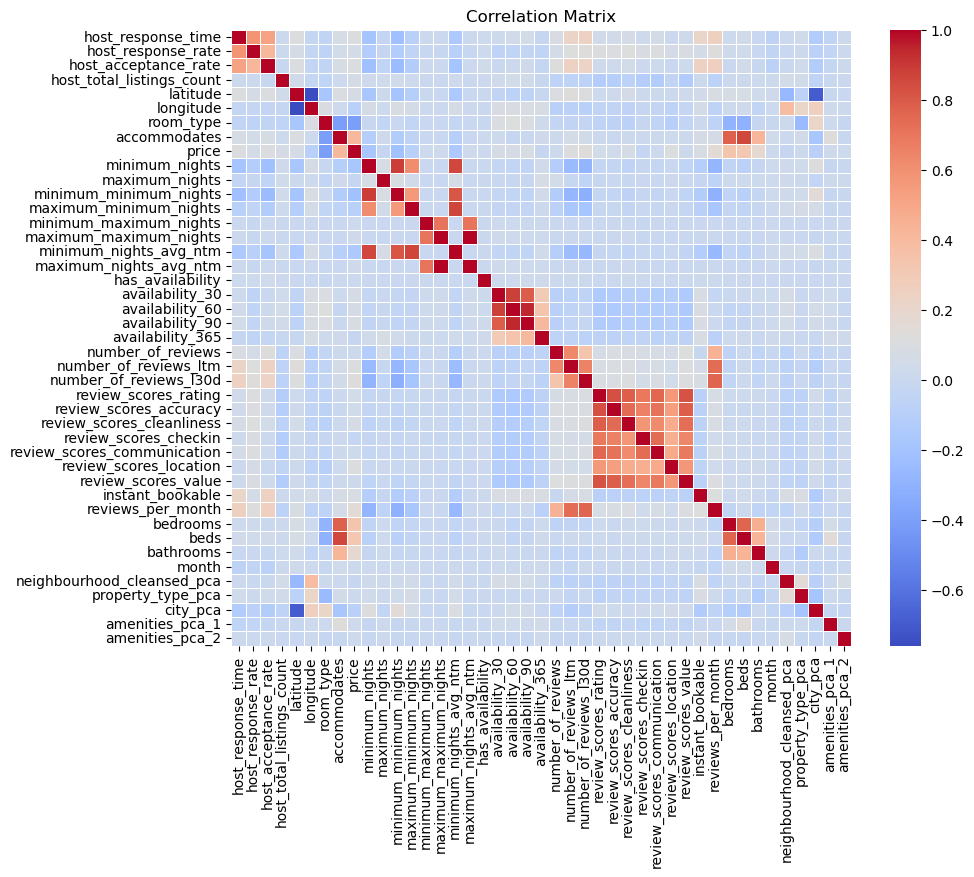

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_train, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [66]:
train_df

,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,room_type,accommodates,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,bedrooms,beds,bathrooms,month,neighbourhood_cleansed_pca,property_type_pca,city_pca,amenities_pca_1,amenities_pca_2
0,3,100,99,2.0,45.51939,-73.56482,0,4,179,2,60,2,2,1125,1125,2.0,1125.0,1,5,17,26,270,419,52,1,2023-05-15,4.69,4.81,4.65,4.82,4.78,4.82,4.70,0,2.65,1.0,2.0,1.0,5,0.730328,0.771144,-0.562705,-0.004752,-0.005372
1,3,100,99,2.0,45.51929,-73.56493,0,4,396,3,21,3,3,21,21,3.0,21.0,1,5,12,21,278,115,20,2,2023-05-24,4.68,4.84,4.63,4.86,4.79,4.87,4.70,0,0.84,2.0,2.0,1.0,5,0.730328,-0.322264,-0.562705,-0.002524,-0.002742
2,1,100,60,1.0,45.53818,-73.60360,0,4,160,14,31,14,14,31,31,14.0,31.0,1,3,11,12,57,9,2,0,2022-11-18,4.88,4.88,5.00,5.00,5.00,4.63,4.88,0,0.06,2.0,3.0,1.0,11,-0.003000,0.771144,-0.562705,-0.002360,-0.002520
3,3,90,85,11.0,45.53026,-73.58413,0,2,160,32,730,32,32,730,730,32.0,730.0,1,0,0,9,284,48,6,0,2023-05-01,4.88,4.92,4.85,4.92,4.89,4.88,4.77,0,0.49,1.0,2.0,1.0,5,-0.011488,0.771144,-0.562705,-0.002360,-0.002520
4,3,93,100,2.0,45.47012,-73.60725,2,5,75,3,365,3,3,1125,1125,3.0,1125.0,1,11,28,51,326,44,15,0,2023-05-05,4.60,4.68,4.16,4.93,4.80,4.61,4.61,1,0.30,4.0,4.0,1.0,5,-0.003310,-0.156477,-0.562705,-0.002360,-0.002520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25304,3,100,100,2.0,49.85877,-97.10543,2,2,110,1,1125,1,1,1125,1125,1.0,1125.0,1,30,60,90,365,1,1,1,2023-05-27,4.00,5.00,4.00,4.00,4.00,3.00,2.00,1,1.00,1.0,1.0,1.0,5,-0.002508,-0.156477,-0.188041,-0.002929,-0.003286
25305,3,100,100,2.0,49.85934,-97.10642,0,2,110,1,1125,1,1,1125,1125,1.0,1125.0,1,28,58,88,363,1,1,1,2023-06-04,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1,1.00,1.0,1.0,1.0,6,-0.002508,0.771144,-0.188041,-0.002929,-0.003286
25306,3,100,100,2.0,49.80697,-97.17540,0,4,133,1,1125,1,1,1125,1125,1.0,1125.0,1,21,42,64,311,2,2,2,2023-06-09,4.50,5.00,4.00,4.50,5.00,5.00,4.50,1,2.00,2.0,2.0,2.0,6,-0.002625,0.771144,-0.188041,0.001133,0.001007
25307,3,100,100,1.0,49.85046,-97.10812,0,6,170,1,365,1,1,365,365,1.0,365.0,1,27,57,87,362,3,3,3,2023-06-10,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1,3.00,3.0,3.0,2.0,6,-0.002508,-0.322264,-0.188041,-0.002593,-0.002852


# Modeling <a class="anchor" id="7"></a>

* Here we'll define X and Y for Modeling. (Last Review is date feature not required for input data.)

In [379]:
X = train_df.drop(['price','last_review'], axis=1)
Y = train_df[['price']]

### Feature Scaling
* Here we are making the objects of Scaling and will use them right brefore providing input in the model.

In [381]:
Sscaler = StandardScaler()
MMscaler = MinMaxScaler()

### Feature Selection 

* Here we'll use Sklearn's **Select K-Best** method to choose ideal features as input to the model.
* As we have a regression problem to be solved we are using **f_regression** as score function.

##### Select K-Best

In [382]:
# Create SelectKBest instance with f_regression scoring function and k=10 (adjust as needed)
k_best = SelectKBest(score_func=f_regression, k=40)

# Fit and transform the SelectKBest instance on the training data
X_train_selected = k_best.fit_transform(X, Y)
selected_features_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_features_indices]
feature_scores = k_best.scores_[selected_features_indices]

# Display the selected features along with their scores
feature_scores_df = pd.DataFrame({'Feature': selected_features, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

* As we can see in the bar, we have gotten around **25 Best Features** for our prediction with respect to price.
* It's visible that features like **Room Type, Accommodates, Bedrooms, Beds, Bathrooms and Minimum Nights** are som of the significant predictor features.

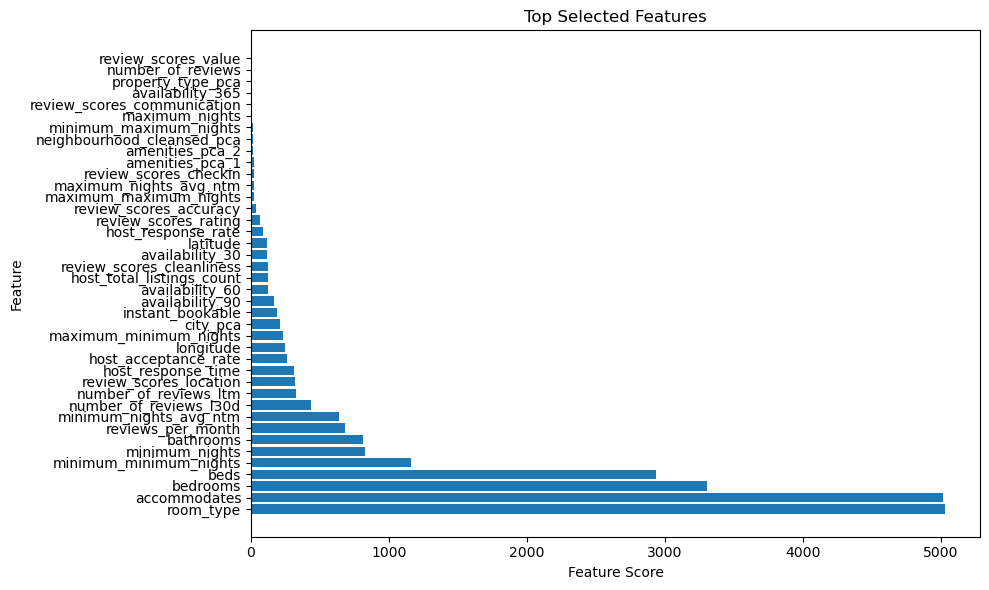

In [383]:
# Plot the feature scores
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df['Feature'], feature_scores_df['Score'])
plt.xlabel('Feature Score')
plt.ylabel('Feature')
plt.title('Top Selected Features')
plt.tight_layout()
plt.show()

#### Applying PCA on last 10 IMP features
* As we have many features as important features, we'll take PCA of last 10 important features.

In [378]:
feature_scores_df['Feature'][-15:]

23           review_scores_rating
24         review_scores_accuracy
13         maximum_maximum_nights
15         maximum_nights_avg_ntm
26          review_scores_checkin
38                amenities_pca_1
39                amenities_pca_2
35     neighbourhood_cleansed_pca
12         minimum_maximum_nights
9                  maximum_nights
27    review_scores_communication
19               availability_365
36              property_type_pca
20              number_of_reviews
29            review_scores_value
Name: Feature, dtype: object

In [388]:
pca_feat = feature_scores_df['Feature'][-15:]

In [389]:
pca_feat = X[pca_feat]
PCA_Kbest = PCA(0.99)
results = PCA_Kbest.fit_transform(pca_feat)

In [391]:
k_best_df = pd.DataFrame(results, columns=['Feat1','Feat2'])

In [392]:
k_best_df

,Feat1,Feat2
0,-507897.779447,-19665.975940
1,-509756.461231,-19216.810060
2,-509739.625375,-19220.878601
3,-508562.797047,-19505.268986
4,-507897.779493,-19665.975967
...,...,...
25304,-507897.779613,-19665.976018
25305,-507897.779613,-19665.976018
25306,-507897.779616,-19665.976019
25307,-509177.306812,-19356.767569


In [394]:
feature_scores_df['Feature'][:-15]

6                     room_type
7                  accommodates
32                     bedrooms
33                         beds
10       minimum_minimum_nights
8                minimum_nights
34                    bathrooms
31            reviews_per_month
14       minimum_nights_avg_ntm
22       number_of_reviews_l30d
21        number_of_reviews_ltm
28       review_scores_location
0            host_response_time
2          host_acceptance_rate
5                     longitude
11       maximum_minimum_nights
37                     city_pca
30             instant_bookable
18              availability_90
17              availability_60
3     host_total_listings_count
25    review_scores_cleanliness
16              availability_30
4                      latitude
1            host_response_rate
Name: Feature, dtype: object

In [395]:
X = X[feature_scores_df['Feature'][:-15]]

In [396]:
X.head()

,room_type,accommodates,bedrooms,beds,minimum_minimum_nights,minimum_nights,bathrooms,reviews_per_month,minimum_nights_avg_ntm,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_location,host_response_time,host_acceptance_rate,longitude,maximum_minimum_nights,city_pca,instant_bookable,availability_90,availability_60,host_total_listings_count,review_scores_cleanliness,availability_30,latitude,host_response_rate
0,0,4,1.0,2.0,2,2,1.0,2.65,2.0,1,52,4.82,3,99,-73.56482,2,-0.562705,0,26,17,2.0,4.65,5,45.51939,100
1,0,4,2.0,2.0,3,3,1.0,0.84,3.0,2,20,4.87,3,99,-73.56493,3,-0.562705,0,21,12,2.0,4.63,5,45.51929,100
2,0,4,2.0,3.0,14,14,1.0,0.06,14.0,0,2,4.63,1,60,-73.60360,14,-0.562705,0,12,11,1.0,5.00,3,45.53818,100
3,0,2,1.0,2.0,32,32,1.0,0.49,32.0,0,6,4.88,3,85,-73.58413,32,-0.562705,0,9,0,11.0,4.85,0,45.53026,90
4,2,5,4.0,4.0,3,3,1.0,0.30,3.0,0,15,4.61,3,100,-73.60725,3,-0.562705,1,51,28,2.0,4.16,11,45.47012,93


In [397]:
X = pd.concat([X, k_best_df], axis=1)

In [398]:
X.isnull().sum()

room_type                    0
accommodates                 0
bedrooms                     0
beds                         0
minimum_minimum_nights       0
minimum_nights               0
bathrooms                    0
reviews_per_month            0
minimum_nights_avg_ntm       0
number_of_reviews_l30d       0
number_of_reviews_ltm        0
review_scores_location       0
host_response_time           0
host_acceptance_rate         0
longitude                    0
maximum_minimum_nights       0
city_pca                     0
instant_bookable             0
availability_90              0
availability_60              0
host_total_listings_count    0
review_scores_cleanliness    0
availability_30              0
latitude                     0
host_response_rate           0
Feat1                        0
Feat2                        0
dtype: int64

In [399]:
X.head()

,room_type,accommodates,bedrooms,beds,minimum_minimum_nights,minimum_nights,bathrooms,reviews_per_month,minimum_nights_avg_ntm,number_of_reviews_l30d,number_of_reviews_ltm,review_scores_location,host_response_time,host_acceptance_rate,longitude,maximum_minimum_nights,city_pca,instant_bookable,availability_90,availability_60,host_total_listings_count,review_scores_cleanliness,availability_30,latitude,host_response_rate,Feat1,Feat2
0,0,4,1.0,2.0,2,2,1.0,2.65,2.0,1,52,4.82,3,99,-73.56482,2,-0.562705,0,26,17,2.0,4.65,5,45.51939,100,-507897.779447,-19665.975940
1,0,4,2.0,2.0,3,3,1.0,0.84,3.0,2,20,4.87,3,99,-73.56493,3,-0.562705,0,21,12,2.0,4.63,5,45.51929,100,-509756.461231,-19216.810060
2,0,4,2.0,3.0,14,14,1.0,0.06,14.0,0,2,4.63,1,60,-73.60360,14,-0.562705,0,12,11,1.0,5.00,3,45.53818,100,-509739.625375,-19220.878601
3,0,2,1.0,2.0,32,32,1.0,0.49,32.0,0,6,4.88,3,85,-73.58413,32,-0.562705,0,9,0,11.0,4.85,0,45.53026,90,-508562.797047,-19505.268986
4,2,5,4.0,4.0,3,3,1.0,0.30,3.0,0,15,4.61,3,100,-73.60725,3,-0.562705,1,51,28,2.0,4.16,11,45.47012,93,-507897.779493,-19665.975967


In [400]:
X.shape

(25309, 27)

#### Prediction Functions

* Here we are making function to appply 3 different regression models.

|Models|
|:--|
|CatBoostRegressor|
|XGBRegressor|
|RandomForestRegressor|

In [406]:
def evaluate_regression_models(X, y, test_size=0.2, random_state=42):

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the models
    models = {
        'CatBoost': CatBoostRegressor(random_state=random_state, silent=True),
        'XGBoost': XGBRegressor(random_state=random_state, verbosity=0),
        'RandomForest': RandomForestRegressor(random_state=random_state)
    }
    
    X_train_scaled = pd.DataFrame(Sscaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(Sscaler.transform(X_test), columns=X_test.columns)

    
    evaluation_results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train_scaled, y_train)
#         model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)
        y_pred_train = model.predict(X_train_scaled)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        r2_t = r2_score(y_train, y_pred_train)

        # Store evaluation results in a dictionary
        evaluation_results[model_name] = {
            'MSE': mse,
            'MAE': mae,
            'R2 test': r2,
            'R2 train' : r2_t
        }

    return evaluation_results

In [407]:
evaluate_regression_models(X,Y,test_size=0.2)

{'CatBoost': {'MSE': 3993.819120307483,
  'MAE': 44.02847704089962,
  'R2 test': 0.6703945004035636,
  'R2 train': 0.7809268071857394},
 'XGBoost': {'MSE': 4105.941381082612,
  'MAE': 44.62177435245405,
  'R2 test': 0.6611411735338624,
  'R2 train': 0.8375646921287889},
 'RandomForest': {'MSE': 4109.031210726986,
  'MAE': 44.55860726985381,
  'R2 test': 0.6608861732915069,
  'R2 train': 0.950714745927498}}

#### Initial Results

|Model|R2 Score(Train)|R2 Score(Test)|
|:--|:--|:--|
|CatBoost|0.78|0.67|
|XGBoost|0.83|0.66|
|RandomForest|0.95|0.66|

### Hyper Parameter Tuning <a class="anchor" id="8"></a>
* Now we are performing Hyper Parameter tuing on **XGBoost** and **CatBoost Regreessor** to get the optimal patameters for better results.
* As Randomforest seems to be **overfitting**, we are going to skip that.

In [523]:
def hyperparameter_tuning_XGBoost(X, y, test_size=0.2, random_state=42):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Define parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300, 400, 500, 600, 800],
        'max_depth': [3, 5, 10, 20],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 1, 2, 3],
        'reg_alpha': [0, 0.1, 0.5, 1],
        'reg_lambda': [0, 0.1, 0.5, 1]
    }
    
    X_train_scaled = pd.DataFrame(Sscaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(Sscaler.transform(X_test), columns=X_test.columns)
    
    
    # Create a RandomForestClassifier
    XG = XGBRegressor(random_state=random_state, n_jobs=-1)
    
    # Perform GridSearchCV
    rand_search = RandomizedSearchCV(estimator=XG, param_distributions=param_grid, cv=50, n_jobs=-1, verbose=2)
    
    # Fit the model
    rand_search.fit(X_train_scaled, y_train)
    
    # Print best parameters and score
    print("Best Parameters:", rand_search.best_params_)
    print("Best Score:", rand_search.best_score_)
    
    # Evaluate on test set
    test_score = rand_search.score(X_test_scaled, y_test)
    print("Test Set Score:", test_score)


In [524]:
hyperparameter_tuning_XGBoost(X, Y, test_size=0.2, random_state=42)

Fitting 50 folds for each of 10 candidates, totalling 500 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.9}
Best Score: 0.6601954655833786
Test Set Score: 0.6686956686883962


In [525]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_scaled = pd.DataFrame(Sscaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(Sscaler.transform(X_test), columns=X_test.columns)

In [553]:
XB = XGBRegressor(subsample=0.8, reg_lambda=0, reg_alpha=0.1, n_estimators=2000, max_depth=10,
                           learning_rate=0.02, gamma=2, colsample_bytree=0.9)

In [554]:
XB.fit(X_train_scaled, y_train)
#         model.fit(X_train, y_train)

# Make predictions
y_pred = XB.predict(X_test_scaled)
y_pred_train = XB.predict(X_train_scaled)
#         y_pred = model.predict(X_test)
#         y_pred_train = model.predict(X_train)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_t = r2_score(y_train, y_pred_train)


# Store evaluation results in a dictionary
print(    'MSE =', mse,
    'MAE =', mae,
    'R2 test = ',r2,
    'R2 train = ', r2_t)

MSE = 3681.740104140034 MAE = 41.69522367469033 R2 test =  0.69615003838334 R2 train =  0.9976757476123086


In [508]:
def hyperparameter_tuning_catboost(X, y, test_size=0.2, random_state=42):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Define parameter grid for RandomizedSearchCV
    param_distributions = {
        'iterations': [100, 200, 300, 400, 500, 1000, 1500, 2000],
    'depth': [6, 8, 10, 12],
    'learning_rate': np.arange(0.01, 0.11, 0.01),
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'max_leaves': [31, 63, 127],
    'subsample': [0.5, 0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel': [0.5, 0.7, 0.8, 0.9, 1.0]
    }
    
    # Scaling the features with StandardScaler
    X_train_scaled = pd.DataFrame(Sscaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(Sscaler.transform(X_test), columns=X_test.columns)
    
    # Create a CatBoostRegressor
    catboost = CatBoostRegressor(random_state=random_state, verbose=0)
    
    # Perform RandomizedSearchCV
    rand_search = RandomizedSearchCV(estimator=catboost, param_distributions=param_distributions, cv=50, n_jobs=-1, verbose=2)
    
    # Fit the model
    rand_search.fit(X_train_scaled, y_train)
    
    # Print best parameters and score
    print("Best Parameters:", rand_search.best_params_)
    print("Best Score:", rand_search.best_score_)
    
    # Evaluate on test set
    test_score = rand_search.score(X_test_scaled, y_test)
    print("Test Set Score:", test_score)


In [509]:
hyperparameter_tuning_catboost(X,Y, test_size=0.2, random_state=42)

Fitting 50 folds for each of 10 candidates, totalling 500 fits
Best Parameters: {'subsample': 0.8, 'max_leaves': 31, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 10, 'colsample_bylevel': 1.0}
Best Score: -626.6147887395373
Test Set Score: -7868.189030562034


In [512]:
cb = CatBoostRegressor(learning_rate=0.05, l2_leaf_reg=3, iterations=2000, depth=8, subsample=0.8,
                        max_leaves=31, colsample_bylevel=1.0, random_state=1)

In [513]:
cb.fit(X_train_scaled, y_train)
#         model.fit(X_train, y_train)

# Make predictions
y_pred = cb.predict(X_test_scaled)
y_pred_train = cb.predict(X_train_scaled)
#         y_pred = model.predict(X_test)
#         y_pred_train = model.predict(X_train)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_t = r2_score(y_train, y_pred_train)


# Store evaluation results in a dictionary
print(    'MSE =', mse,
    'MAE =', mae,
    'R2 test = ',r2,
    'R2 train = ', r2_t)

0:	learn: 107.8055306	total: 6.83ms	remaining: 13.7s
1:	learn: 105.6114784	total: 13.6ms	remaining: 13.6s
2:	learn: 103.5754538	total: 19.4ms	remaining: 12.9s
3:	learn: 101.6429942	total: 25.1ms	remaining: 12.5s
4:	learn: 99.9414132	total: 30.9ms	remaining: 12.3s
5:	learn: 98.2126106	total: 36.8ms	remaining: 12.2s
6:	learn: 96.6869767	total: 42.4ms	remaining: 12.1s
7:	learn: 95.1611623	total: 48.3ms	remaining: 12s
8:	learn: 93.8565386	total: 54ms	remaining: 11.9s
9:	learn: 92.6032232	total: 59.8ms	remaining: 11.9s
10:	learn: 91.4050711	total: 65.7ms	remaining: 11.9s
11:	learn: 90.2960294	total: 71.9ms	remaining: 11.9s
12:	learn: 89.2659310	total: 78.3ms	remaining: 12s
13:	learn: 88.2551192	total: 84.4ms	remaining: 12s
14:	learn: 87.3541757	total: 90.5ms	remaining: 12s
15:	learn: 86.5154003	total: 96.5ms	remaining: 12s
16:	learn: 85.7010862	total: 102ms	remaining: 11.9s
17:	learn: 84.9534928	total: 108ms	remaining: 11.9s
18:	learn: 84.3131732	total: 114ms	remaining: 11.9s
19:	learn: 83.

166:	learn: 64.6828697	total: 822ms	remaining: 9.02s
167:	learn: 64.6464273	total: 827ms	remaining: 9.02s
168:	learn: 64.6127338	total: 832ms	remaining: 9.02s
169:	learn: 64.5855855	total: 837ms	remaining: 9.01s
170:	learn: 64.5467789	total: 842ms	remaining: 9.01s
171:	learn: 64.5140453	total: 847ms	remaining: 9s
172:	learn: 64.4657001	total: 851ms	remaining: 8.99s
173:	learn: 64.4061675	total: 856ms	remaining: 8.98s
174:	learn: 64.3538814	total: 861ms	remaining: 8.98s
175:	learn: 64.3143809	total: 866ms	remaining: 8.97s
176:	learn: 64.2754669	total: 870ms	remaining: 8.96s
177:	learn: 64.2198156	total: 875ms	remaining: 8.95s
178:	learn: 64.1785119	total: 880ms	remaining: 8.95s
179:	learn: 64.1283942	total: 884ms	remaining: 8.94s
180:	learn: 64.0769778	total: 889ms	remaining: 8.93s
181:	learn: 64.0545563	total: 893ms	remaining: 8.92s
182:	learn: 64.0100288	total: 898ms	remaining: 8.92s
183:	learn: 63.9740035	total: 902ms	remaining: 8.91s
184:	learn: 63.9283957	total: 907ms	remaining: 8.

328:	learn: 58.7036886	total: 1.65s	remaining: 8.4s
329:	learn: 58.6745896	total: 1.66s	remaining: 8.39s
330:	learn: 58.6496637	total: 1.66s	remaining: 8.39s
331:	learn: 58.6272638	total: 1.67s	remaining: 8.39s
332:	learn: 58.5710343	total: 1.67s	remaining: 8.38s
333:	learn: 58.5286497	total: 1.68s	remaining: 8.38s
334:	learn: 58.5212733	total: 1.68s	remaining: 8.37s
335:	learn: 58.4892693	total: 1.69s	remaining: 8.36s
336:	learn: 58.4634392	total: 1.69s	remaining: 8.36s
337:	learn: 58.4435815	total: 1.7s	remaining: 8.35s
338:	learn: 58.4230228	total: 1.7s	remaining: 8.34s
339:	learn: 58.3882468	total: 1.71s	remaining: 8.34s
340:	learn: 58.3586613	total: 1.71s	remaining: 8.33s
341:	learn: 58.3050588	total: 1.72s	remaining: 8.32s
342:	learn: 58.2733115	total: 1.72s	remaining: 8.32s
343:	learn: 58.2470736	total: 1.73s	remaining: 8.31s
344:	learn: 58.2232438	total: 1.73s	remaining: 8.3s
345:	learn: 58.1819247	total: 1.74s	remaining: 8.3s
346:	learn: 58.1476386	total: 1.74s	remaining: 8.29

487:	learn: 54.4482279	total: 2.44s	remaining: 7.57s
488:	learn: 54.4257353	total: 2.45s	remaining: 7.57s
489:	learn: 54.4208893	total: 2.45s	remaining: 7.56s
490:	learn: 54.4029734	total: 2.46s	remaining: 7.55s
491:	learn: 54.3980230	total: 2.46s	remaining: 7.55s
492:	learn: 54.3647767	total: 2.47s	remaining: 7.54s
493:	learn: 54.3430487	total: 2.47s	remaining: 7.54s
494:	learn: 54.3247370	total: 2.48s	remaining: 7.53s
495:	learn: 54.3116637	total: 2.48s	remaining: 7.53s
496:	learn: 54.2878087	total: 2.49s	remaining: 7.52s
497:	learn: 54.2679657	total: 2.49s	remaining: 7.51s
498:	learn: 54.2369575	total: 2.5s	remaining: 7.51s
499:	learn: 54.2184028	total: 2.5s	remaining: 7.5s
500:	learn: 54.1887683	total: 2.5s	remaining: 7.5s
501:	learn: 54.1702154	total: 2.51s	remaining: 7.49s
502:	learn: 54.1272186	total: 2.51s	remaining: 7.48s
503:	learn: 54.1118887	total: 2.52s	remaining: 7.48s
504:	learn: 54.0915048	total: 2.52s	remaining: 7.47s
505:	learn: 54.0588273	total: 2.53s	remaining: 7.46

650:	learn: 51.2453703	total: 3.24s	remaining: 6.71s
651:	learn: 51.2318423	total: 3.25s	remaining: 6.71s
652:	learn: 51.2200440	total: 3.25s	remaining: 6.71s
653:	learn: 51.2052417	total: 3.26s	remaining: 6.7s
654:	learn: 51.1915651	total: 3.26s	remaining: 6.7s
655:	learn: 51.1767449	total: 3.27s	remaining: 6.69s
656:	learn: 51.1604933	total: 3.27s	remaining: 6.68s
657:	learn: 51.1275872	total: 3.27s	remaining: 6.68s
658:	learn: 51.1040154	total: 3.28s	remaining: 6.67s
659:	learn: 51.0895978	total: 3.28s	remaining: 6.67s
660:	learn: 51.0706420	total: 3.29s	remaining: 6.66s
661:	learn: 51.0506891	total: 3.29s	remaining: 6.66s
662:	learn: 51.0388324	total: 3.3s	remaining: 6.65s
663:	learn: 51.0233960	total: 3.3s	remaining: 6.65s
664:	learn: 51.0057039	total: 3.31s	remaining: 6.64s
665:	learn: 50.9798617	total: 3.31s	remaining: 6.63s
666:	learn: 50.9745483	total: 3.32s	remaining: 6.63s
667:	learn: 50.9548767	total: 3.32s	remaining: 6.62s
668:	learn: 50.9352794	total: 3.33s	remaining: 6.6

813:	learn: 48.5611912	total: 4.03s	remaining: 5.88s
814:	learn: 48.5441380	total: 4.04s	remaining: 5.87s
815:	learn: 48.5274553	total: 4.04s	remaining: 5.87s
816:	learn: 48.5111069	total: 4.05s	remaining: 5.86s
817:	learn: 48.4986584	total: 4.05s	remaining: 5.86s
818:	learn: 48.4839286	total: 4.06s	remaining: 5.85s
819:	learn: 48.4707012	total: 4.06s	remaining: 5.84s
820:	learn: 48.4567803	total: 4.07s	remaining: 5.84s
821:	learn: 48.4396082	total: 4.07s	remaining: 5.83s
822:	learn: 48.4195933	total: 4.08s	remaining: 5.83s
823:	learn: 48.3967906	total: 4.08s	remaining: 5.82s
824:	learn: 48.3854230	total: 4.08s	remaining: 5.82s
825:	learn: 48.3694215	total: 4.09s	remaining: 5.81s
826:	learn: 48.3553211	total: 4.09s	remaining: 5.81s
827:	learn: 48.3483950	total: 4.1s	remaining: 5.8s
828:	learn: 48.3276712	total: 4.1s	remaining: 5.79s
829:	learn: 48.3170335	total: 4.11s	remaining: 5.79s
830:	learn: 48.2955177	total: 4.11s	remaining: 5.79s
831:	learn: 48.2884931	total: 4.12s	remaining: 5.

976:	learn: 46.1728226	total: 4.84s	remaining: 5.07s
977:	learn: 46.1559139	total: 4.85s	remaining: 5.07s
978:	learn: 46.1368254	total: 4.86s	remaining: 5.06s
979:	learn: 46.1140805	total: 4.86s	remaining: 5.06s
980:	learn: 46.0943221	total: 4.87s	remaining: 5.05s
981:	learn: 46.0799013	total: 4.87s	remaining: 5.05s
982:	learn: 46.0638154	total: 4.87s	remaining: 5.04s
983:	learn: 46.0492888	total: 4.88s	remaining: 5.04s
984:	learn: 46.0397133	total: 4.88s	remaining: 5.03s
985:	learn: 46.0295901	total: 4.89s	remaining: 5.03s
986:	learn: 46.0294890	total: 4.89s	remaining: 5.02s
987:	learn: 46.0117707	total: 4.9s	remaining: 5.02s
988:	learn: 46.0076624	total: 4.9s	remaining: 5.01s
989:	learn: 45.9958806	total: 4.91s	remaining: 5.01s
990:	learn: 45.9781832	total: 4.91s	remaining: 5s
991:	learn: 45.9591845	total: 4.92s	remaining: 5s
992:	learn: 45.9391570	total: 4.92s	remaining: 4.99s
993:	learn: 45.9231559	total: 4.93s	remaining: 4.99s
994:	learn: 45.9093852	total: 4.93s	remaining: 4.98s
9

1142:	learn: 44.0264969	total: 5.64s	remaining: 4.23s
1143:	learn: 44.0079285	total: 5.64s	remaining: 4.22s
1144:	learn: 43.9926974	total: 5.65s	remaining: 4.22s
1145:	learn: 43.9788747	total: 5.65s	remaining: 4.21s
1146:	learn: 43.9763351	total: 5.66s	remaining: 4.21s
1147:	learn: 43.9553439	total: 5.66s	remaining: 4.2s
1148:	learn: 43.9525293	total: 5.67s	remaining: 4.2s
1149:	learn: 43.9394108	total: 5.67s	remaining: 4.19s
1150:	learn: 43.9290384	total: 5.68s	remaining: 4.19s
1151:	learn: 43.9229000	total: 5.68s	remaining: 4.18s
1152:	learn: 43.9100262	total: 5.69s	remaining: 4.18s
1153:	learn: 43.9054660	total: 5.69s	remaining: 4.17s
1154:	learn: 43.8947904	total: 5.7s	remaining: 4.17s
1155:	learn: 43.8800899	total: 5.7s	remaining: 4.16s
1156:	learn: 43.8800293	total: 5.71s	remaining: 4.16s
1157:	learn: 43.8701627	total: 5.71s	remaining: 4.15s
1158:	learn: 43.8608841	total: 5.72s	remaining: 4.15s
1159:	learn: 43.8493159	total: 5.72s	remaining: 4.14s
1160:	learn: 43.8314138	total: 5

1302:	learn: 42.2069246	total: 6.43s	remaining: 3.44s
1303:	learn: 42.2022272	total: 6.44s	remaining: 3.44s
1304:	learn: 42.1912912	total: 6.44s	remaining: 3.43s
1305:	learn: 42.1830072	total: 6.45s	remaining: 3.42s
1306:	learn: 42.1723102	total: 6.45s	remaining: 3.42s
1307:	learn: 42.1602457	total: 6.46s	remaining: 3.42s
1308:	learn: 42.1491940	total: 6.46s	remaining: 3.41s
1309:	learn: 42.1343697	total: 6.46s	remaining: 3.4s
1310:	learn: 42.1249696	total: 6.47s	remaining: 3.4s
1311:	learn: 42.1076246	total: 6.47s	remaining: 3.4s
1312:	learn: 42.0945722	total: 6.48s	remaining: 3.39s
1313:	learn: 42.0853322	total: 6.48s	remaining: 3.38s
1314:	learn: 42.0708974	total: 6.49s	remaining: 3.38s
1315:	learn: 42.0638828	total: 6.49s	remaining: 3.37s
1316:	learn: 42.0539009	total: 6.5s	remaining: 3.37s
1317:	learn: 42.0379676	total: 6.5s	remaining: 3.36s
1318:	learn: 42.0283898	total: 6.51s	remaining: 3.36s
1319:	learn: 42.0195006	total: 6.51s	remaining: 3.35s
1320:	learn: 42.0103579	total: 6.

1464:	learn: 40.4705458	total: 7.23s	remaining: 2.64s
1465:	learn: 40.4563932	total: 7.23s	remaining: 2.63s
1466:	learn: 40.4465299	total: 7.24s	remaining: 2.63s
1467:	learn: 40.4317307	total: 7.25s	remaining: 2.63s
1468:	learn: 40.4202693	total: 7.25s	remaining: 2.62s
1469:	learn: 40.4124959	total: 7.26s	remaining: 2.62s
1470:	learn: 40.4029519	total: 7.27s	remaining: 2.61s
1471:	learn: 40.3903387	total: 7.27s	remaining: 2.61s
1472:	learn: 40.3798608	total: 7.28s	remaining: 2.6s
1473:	learn: 40.3696868	total: 7.28s	remaining: 2.6s
1474:	learn: 40.3605483	total: 7.29s	remaining: 2.59s
1475:	learn: 40.3479831	total: 7.29s	remaining: 2.59s
1476:	learn: 40.3386964	total: 7.3s	remaining: 2.58s
1477:	learn: 40.3283073	total: 7.3s	remaining: 2.58s
1478:	learn: 40.3191992	total: 7.3s	remaining: 2.57s
1479:	learn: 40.3075522	total: 7.31s	remaining: 2.57s
1480:	learn: 40.2981017	total: 7.32s	remaining: 2.56s
1481:	learn: 40.2865184	total: 7.32s	remaining: 2.56s
1482:	learn: 40.2828195	total: 7.

1627:	learn: 38.8351400	total: 8.03s	remaining: 1.83s
1628:	learn: 38.8215202	total: 8.03s	remaining: 1.83s
1629:	learn: 38.8133440	total: 8.04s	remaining: 1.82s
1630:	learn: 38.8026937	total: 8.04s	remaining: 1.82s
1631:	learn: 38.7866572	total: 8.05s	remaining: 1.81s
1632:	learn: 38.7726164	total: 8.05s	remaining: 1.81s
1633:	learn: 38.7682920	total: 8.06s	remaining: 1.8s
1634:	learn: 38.7582362	total: 8.06s	remaining: 1.8s
1635:	learn: 38.7472391	total: 8.07s	remaining: 1.79s
1636:	learn: 38.7364521	total: 8.07s	remaining: 1.79s
1637:	learn: 38.7280349	total: 8.08s	remaining: 1.78s
1638:	learn: 38.7171440	total: 8.08s	remaining: 1.78s
1639:	learn: 38.7094608	total: 8.09s	remaining: 1.77s
1640:	learn: 38.6985805	total: 8.09s	remaining: 1.77s
1641:	learn: 38.6826842	total: 8.1s	remaining: 1.76s
1642:	learn: 38.6741399	total: 8.1s	remaining: 1.76s
1643:	learn: 38.6674674	total: 8.11s	remaining: 1.75s
1644:	learn: 38.6636137	total: 8.11s	remaining: 1.75s
1645:	learn: 38.6570209	total: 8

1792:	learn: 37.2525293	total: 8.83s	remaining: 1.02s
1793:	learn: 37.2435187	total: 8.84s	remaining: 1.01s
1794:	learn: 37.2338715	total: 8.84s	remaining: 1.01s
1795:	learn: 37.2256877	total: 8.85s	remaining: 1s
1796:	learn: 37.2146871	total: 8.85s	remaining: 1000ms
1797:	learn: 37.2050074	total: 8.86s	remaining: 995ms
1798:	learn: 37.2008666	total: 8.86s	remaining: 990ms
1799:	learn: 37.1877391	total: 8.87s	remaining: 985ms
1800:	learn: 37.1804084	total: 8.87s	remaining: 980ms
1801:	learn: 37.1775662	total: 8.88s	remaining: 976ms
1802:	learn: 37.1639607	total: 8.88s	remaining: 971ms
1803:	learn: 37.1569803	total: 8.89s	remaining: 966ms
1804:	learn: 37.1508447	total: 8.89s	remaining: 961ms
1805:	learn: 37.1361352	total: 8.9s	remaining: 956ms
1806:	learn: 37.1315344	total: 8.9s	remaining: 951ms
1807:	learn: 37.1211705	total: 8.91s	remaining: 946ms
1808:	learn: 37.1092847	total: 8.91s	remaining: 941ms
1809:	learn: 37.0984808	total: 8.92s	remaining: 936ms
1810:	learn: 37.0837575	total: 8

1947:	learn: 35.8899756	total: 9.63s	remaining: 257ms
1948:	learn: 35.8840924	total: 9.64s	remaining: 252ms
1949:	learn: 35.8784520	total: 9.65s	remaining: 247ms
1950:	learn: 35.8727822	total: 9.65s	remaining: 242ms
1951:	learn: 35.8577301	total: 9.66s	remaining: 237ms
1952:	learn: 35.8485010	total: 9.66s	remaining: 233ms
1953:	learn: 35.8396829	total: 9.67s	remaining: 228ms
1954:	learn: 35.8238976	total: 9.67s	remaining: 223ms
1955:	learn: 35.8184243	total: 9.68s	remaining: 218ms
1956:	learn: 35.8096494	total: 9.68s	remaining: 213ms
1957:	learn: 35.8050326	total: 9.69s	remaining: 208ms
1958:	learn: 35.7985154	total: 9.69s	remaining: 203ms
1959:	learn: 35.7899141	total: 9.7s	remaining: 198ms
1960:	learn: 35.7830192	total: 9.7s	remaining: 193ms
1961:	learn: 35.7726799	total: 9.71s	remaining: 188ms
1962:	learn: 35.7587030	total: 9.71s	remaining: 183ms
1963:	learn: 35.7519681	total: 9.72s	remaining: 178ms
1964:	learn: 35.7445438	total: 9.72s	remaining: 173ms
1965:	learn: 35.7327352	total:

### Results after Hypter Parameter <a class="anchor" id="9"></a>

##### XG Boost

* The XGBoost model demonstrates strong performance with a low Mean Squared Error **(MSE) of 3681.74** and a Mean Absolute Error **(MAE) of 41.70**. It showcases excellent predictive capabilities as evident from its **high R2 test score of 0.70**, indicating that around 70% of the variance in the target variable is explained by the model. However, its **very high R2 train score of 0.99** suggests **a possibility of overfitting** wihch is less generalized on new data.

#### Cat Boost
* The CatBoost model achieves competitive results with an **MSE of 3772.46** and an **MAE of 42.50**. Its **R2 test score of 0.69** reflects its ability to capture patterns in the data, accounting for about 69% of the variance. The model's **R2 train score of 0.90 highlights a balanced fit that avoids extreme overfitting**, making it a comparatively  reliable predictor for unseen data.

## Demand ForeCasting <a class="anchor" id="10"></a>

In [555]:
dfor_train = train_df.copy()

In [556]:
dfor_train.head(2)

,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,room_type,accommodates,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,bedrooms,beds,bathrooms,month,neighbourhood_cleansed_pca,property_type_pca,city_pca,amenities_pca_1,amenities_pca_2
0,3,100,99,2.0,45.51939,-73.56482,0,4,179,2,60,2,2,1125,1125,2.0,1125.0,1,5,17,26,270,419,52,1,2023-05-15,4.69,4.81,4.65,4.82,4.78,4.82,4.7,0,2.65,1.0,2.0,1.0,5,0.730328,0.771144,-0.562705,-0.004752,-0.005372
1,3,100,99,2.0,45.51929,-73.56493,0,4,396,3,21,3,3,21,21,3.0,21.0,1,5,12,21,278,115,20,2,2023-05-24,4.68,4.84,4.63,4.86,4.79,4.87,4.7,0,0.84,2.0,2.0,1.0,5,0.730328,-0.322264,-0.562705,-0.002524,-0.002742


#### We are taking availability_60, availability_90, availability_365 one by one for our target variable. Which will tell is if particular proparty is available in the future for respective days or not.

###### Select K best for Demad Forecasting

In [595]:
def availability(pred_days):
    global X_
    global Y_
    if pred_days==60:
        X_ = dfor_train.drop([f'availability_60', 'last_review', 'availability_90', 'availability_365'], axis=1)
        Y_ = dfor_train['availability_60']
    elif pred_days==90:
        X_ = dfor_train.drop([f'availability_90', 'last_review', 'availability_365'], axis=1)
        Y_ = dfor_train['availability_90']
    else:
        X_ = dfor_train.drop([f'last_review', 'availability_365'], axis=1)
        Y_ = dfor_train['availability_365']

In [581]:
X_ = dfor_train.drop(['availability_60', 'last_review', 'availability_90', 'availability_365'], axis=1)
Y_ = dfor_train['availability_60']

In [582]:
X_

,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,room_type,accommodates,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,bedrooms,beds,bathrooms,month,neighbourhood_cleansed_pca,property_type_pca,city_pca,amenities_pca_1,amenities_pca_2
0,3,100,99,2.0,45.51939,-73.56482,0,4,179,2,60,2,2,1125,1125,2.0,1125.0,1,5,419,52,1,4.69,4.81,4.65,4.82,4.78,4.82,4.70,0,2.65,1.0,2.0,1.0,5,0.730328,0.771144,-0.562705,-0.004752,-0.005372
1,3,100,99,2.0,45.51929,-73.56493,0,4,396,3,21,3,3,21,21,3.0,21.0,1,5,115,20,2,4.68,4.84,4.63,4.86,4.79,4.87,4.70,0,0.84,2.0,2.0,1.0,5,0.730328,-0.322264,-0.562705,-0.002524,-0.002742
2,1,100,60,1.0,45.53818,-73.60360,0,4,160,14,31,14,14,31,31,14.0,31.0,1,3,9,2,0,4.88,4.88,5.00,5.00,5.00,4.63,4.88,0,0.06,2.0,3.0,1.0,11,-0.003000,0.771144,-0.562705,-0.002360,-0.002520
3,3,90,85,11.0,45.53026,-73.58413,0,2,160,32,730,32,32,730,730,32.0,730.0,1,0,48,6,0,4.88,4.92,4.85,4.92,4.89,4.88,4.77,0,0.49,1.0,2.0,1.0,5,-0.011488,0.771144,-0.562705,-0.002360,-0.002520
4,3,93,100,2.0,45.47012,-73.60725,2,5,75,3,365,3,3,1125,1125,3.0,1125.0,1,11,44,15,0,4.60,4.68,4.16,4.93,4.80,4.61,4.61,1,0.30,4.0,4.0,1.0,5,-0.003310,-0.156477,-0.562705,-0.002360,-0.002520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25304,3,100,100,2.0,49.85877,-97.10543,2,2,110,1,1125,1,1,1125,1125,1.0,1125.0,1,30,1,1,1,4.00,5.00,4.00,4.00,4.00,3.00,2.00,1,1.00,1.0,1.0,1.0,5,-0.002508,-0.156477,-0.188041,-0.002929,-0.003286
25305,3,100,100,2.0,49.85934,-97.10642,0,2,110,1,1125,1,1,1125,1125,1.0,1125.0,1,28,1,1,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1,1.00,1.0,1.0,1.0,6,-0.002508,0.771144,-0.188041,-0.002929,-0.003286
25306,3,100,100,2.0,49.80697,-97.17540,0,4,133,1,1125,1,1,1125,1125,1.0,1125.0,1,21,2,2,2,4.50,5.00,4.00,4.50,5.00,5.00,4.50,1,2.00,2.0,2.0,2.0,6,-0.002625,0.771144,-0.188041,0.001133,0.001007
25307,3,100,100,1.0,49.85046,-97.10812,0,6,170,1,365,1,1,365,365,1.0,365.0,1,27,3,3,3,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1,3.00,3.0,3.0,2.0,6,-0.002508,-0.322264,-0.188041,-0.002593,-0.002852


In [608]:
# Create SelectKBest instance with f_regression scoring function and k=10 (adjust as needed)
def select_k_best():
    global selected_features
    k_best = SelectKBest(score_func=f_regression, k=15)
    
    # Fit and transform the SelectKBest instance on the training data
    X_train_selected = k_best.fit_transform(X_, Y_)
    selected_features_indices = k_best.get_support(indices=True)

    # Get the names of the selected features
    selected_features = X_.columns[selected_features_indices]
    feature_scores = k_best.scores_[selected_features_indices]

    # Display the selected features along with their scores
    feature_scores_df = pd.DataFrame({'Feature': selected_features, 'Score': feature_scores})
    feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

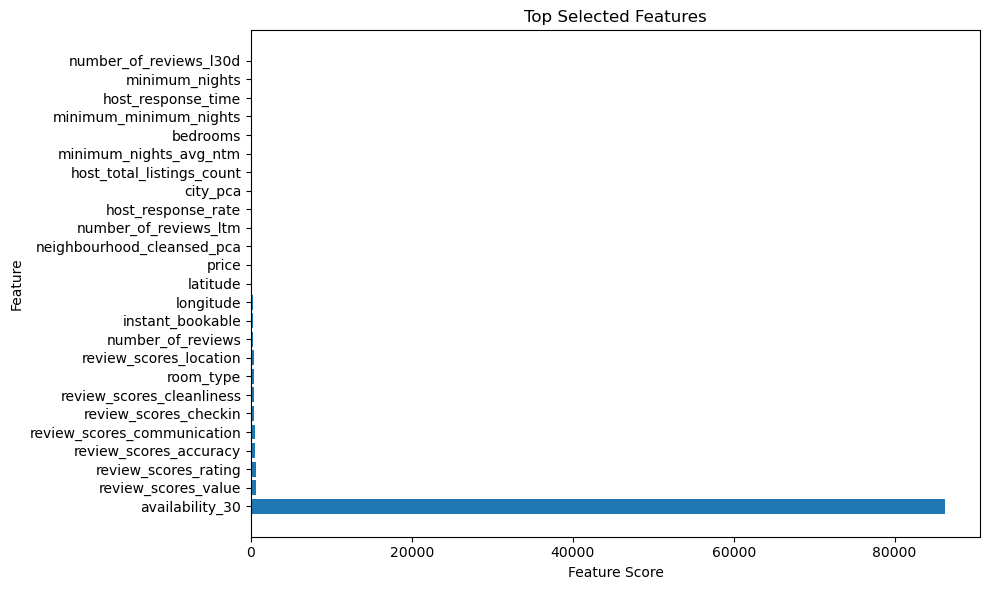

In [584]:
# Plot the feature scores
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df['Feature'], feature_scores_df['Score'])
plt.xlabel('Feature Score')
plt.ylabel('Feature')
plt.title('Top Selected Features')
plt.tight_layout()
plt.show()

In [611]:
def demand_forecasting(test_size=0.2, random_state=42, pred_days=60, returns=False):

    availability(pred_days)
    select_k_best()
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=test_size, random_state=random_state)
    # Initialize the models
    models = {
        'CatBoost': CatBoostRegressor(random_state=random_state, silent=True),
        'XGBoost': XGBRegressor(random_state=random_state, verbosity=0)
    }
    
    X_train_scaled = pd.DataFrame(Sscaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(Sscaler.transform(X_test), columns=X_test.columns)
    
    X_train_scaled = X_train_scaled[selected_features]
    X_test_scaled = X_test_scaled[selected_features]
#     print(X_train_scaled.columns)
    evaluation_results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)
        y_pred_train = model.predict(X_train_scaled)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        r2_t = r2_score(y_train, y_pred_train)

        # Store evaluation results in a dictionary
        evaluation_results[model_name] = {
            'MSE': mse,
            'MAE': mae,
            'R2 test': r2,
            'R2 train' : r2_t
        }

    if returns:
        return evaluation_results, y_test, y_pred
    return evaluation_results

In [614]:
demand_forecasting(test_size=0.2, random_state=42, pred_days=60)

Index(['latitude', 'longitude', 'room_type', 'price', 'availability_30',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'neighbourhood_cleansed_pca'],
      dtype='object')


{'CatBoost': {'MSE': 65.46203054352492,
  'MAE': 6.233790568988772,
  'R2 test': 0.7934546833279392,
  'R2 train': 0.8542113677517502},
 'XGBoost': {'MSE': 68.44799100129357,
  'MAE': 6.329429121505313,
  'R2 test': 0.7840334028818643,
  'R2 train': 0.8835189824811898},
 'RandomForest': {'MSE': 68.57615892927697,
  'MAE': 6.43453773212169,
  'R2 test': 0.7836290083793911,
  'R2 train': 0.9704200767423544}}

### Results for Demand Forecasting <a class="anchor" id="11"></a>

#### CatBoostClassifier
* The CatBoost model performs well in demand forecasting with a low Mean Squared Error **(MSE) of 65.46** and a Mean Absolute Error **(MAE) of 6.23**. Its **R2 test score of 0.79 indicates that around 79% of the variability** in the demand can be explained by the model. The **R2 train score of 0.85** highlights a balanced fit, demonstrating that the model effectively captures the underlying patterns in the training data.
#### XGBoostClassifier
* The XGBoost model also shows promising results with an **MSE of 68.45** and an **MAE of 6.33**. Its **R2 test score of 0.78 implies that approximately 78% of the demand variability** is accounted for. The model's **R2 train score of 0.88 indicates successful generalization** and a robust grasp of demand dynamics during training.
#### RandomForestClassifier
* The Random Forest model delivers competitive performance with an **MSE of 68.58 and an MAE of 6.43**. Its **R2 test score of 0.78 suggests that around 78% of the demand variability** is captured by the model. The impressive **R2 train score of 0.97 indicates that the model effectively adapts to the training data, although the overfitting is visible.**